# Exemplo de PCA

Esse notebook mostra como plotar dados em 2d e 3d com Python, levanta a questão de como visualizar dados em maiores dimensões com a intenção de termos uma intuição de como funciona PCA e diminuição de dimensões.

In [1]:
import numpy as np
import pandas as pd

ALUNOS = 1000

def poucos_cursos():
    return (np.random.randn(ALUNOS) + 3).astype(int)

def muitos_cursos():
    return (3 * np.random.randn(ALUNOS) + 20).astype(int)

print("Exemplo de muitos cursos ", muitos_cursos()[:5])
print("Exemplo de poucos cursos ", poucos_cursos()[:5])

Exemplo de muitos cursos  [16 19 21 13 23]
Exemplo de poucos cursos  [3 3 3 5 2]


In [2]:
def gera_alunos(programacao, design):
    linhas = np.array([programacao, design]).T
    alunos = pd.DataFrame(linhas, columns=["programacao", "design"])
    return alunos

gera_alunos(muitos_cursos(), poucos_cursos()).head()

,programacao,design
0,17,3
1,18,3
2,23,3
3,22,3
4,14,4


In [3]:
programacao = gera_alunos(muitos_cursos(), poucos_cursos())
design = gera_alunos(poucos_cursos(), muitos_cursos())

alunos = programacao.append(design, sort=False)

import seaborn as sns
sns.scatterplot(x="programacao", y="design", data=alunos)

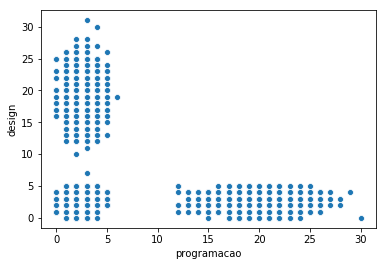

In [4]:
def gera_alunos(programacao, design, mobile):
    linhas = np.array([programacao, design, mobile]).T
    alunos = pd.DataFrame(linhas, columns=["programacao", "design", "mobile"])
    return alunos

programacao = gera_alunos(muitos_cursos(), poucos_cursos(), poucos_cursos())
design = gera_alunos(poucos_cursos(), muitos_cursos(), poucos_cursos())
mobile = gera_alunos(poucos_cursos(), poucos_cursos(), muitos_cursos())

alunos = programacao.append(design, sort=False).append(mobile, sort=False).fillna(0)
sns.scatterplot(x="programacao", y="design", data=alunos)

In [5]:
def gera_alunos(categoria, programacao, design, mobile):
    linhas = np.array([programacao, design, mobile]).T
    alunos = pd.DataFrame(linhas, columns=["programacao", "design", "mobile"])
    alunos['categoria'] = categoria
    return alunos

print(gera_alunos('programacao', muitos_cursos(), poucos_cursos(), poucos_cursos())[:5])

   programacao  design  mobile    categoria
0           21       4       3  programacao
1           24       3       3  programacao
2           23       2       3  programacao
3           24       2       4  programacao
4           21       3       3  programacao


In [6]:
def gera_alunos(categoria, programacao=poucos_cursos(), design=poucos_cursos(), mobile=poucos_cursos()):
    linhas = np.array([programacao, design, mobile]).T
    alunos = pd.DataFrame(linhas, columns=["programacao", "design", "mobile"])
    alunos['categoria'] = categoria
    return alunos

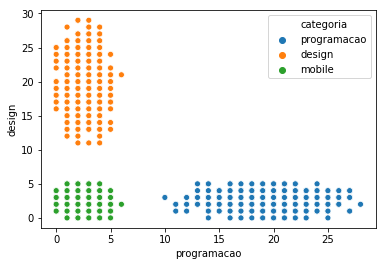

In [7]:
programacao = gera_alunos('programacao',programacao=muitos_cursos())
design = gera_alunos('design',design=muitos_cursos())
mobile = gera_alunos('mobile',mobile=muitos_cursos())

alunos = programacao.append(design, sort=False).append(mobile, sort=False)
sns.scatterplot(x="programacao", y="design", hue="categoria", data=alunos)

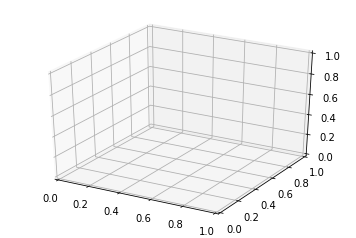

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(alunos.programacao, alunos.design, alunos.mobile, c=alunos.categoria)
# não funciona pois as categorias devem ser cores

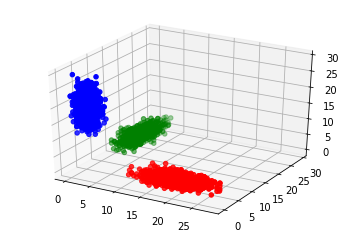

In [9]:
cores = {'programacao':'red', 'mobile':'blue', 'design':'green'}

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(alunos.programacao, alunos.design, alunos.mobile, c=alunos.categoria.apply(lambda x: cores[x]))

# Refatorando para simplificar a geração de alunos e alunas aleatoriamente

In [10]:
def matriculas_aleatorias(n):
    return (np.random.randn(ALUNOS, n) + 3).astype(int)

matriculas_aleatorias(3)

array([[3, 4, 1],
       [2, 4, 3],
       [3, 4, 2],
       ...,
       [3, 3, 3],
       [2, 0, 3],
       [3, 2, 3]])

In [11]:
def gera_alunos(categorias, categoria):
    linhas = matriculas_aleatorias(len(categorias))
    alunos = pd.DataFrame(linhas, columns=categorias)
    alunos[categoria] = muitos_cursos()
    alunos['categoria'] = categoria
    return alunos
gera_alunos(["programacao", "design", "mobile"], "programacao").head()

,programacao,design,mobile,categoria
0,18,2,2,programacao
1,19,4,4,programacao
2,26,2,0,programacao
3,24,0,2,programacao
4,21,3,3,programacao


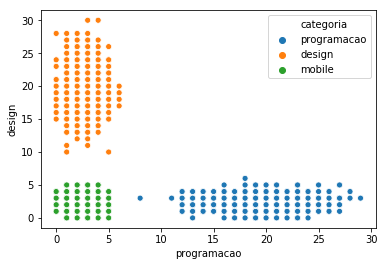

In [12]:
def gera_todos_os_alunos(categorias):
    alunos = pd.DataFrame([], columns = categorias)
    for categoria in categorias:
        novos = gera_alunos(categorias, categoria)
        alunos = alunos.append(novos, sort=False)
    return alunos

alunos = gera_todos_os_alunos(['programacao', 'design', 'mobile'])
sns.scatterplot(x="programacao", y="design", hue="categoria", data=alunos)

# Gerando e tentando visualizar alunos e alunas em 4 ou mais dimensões

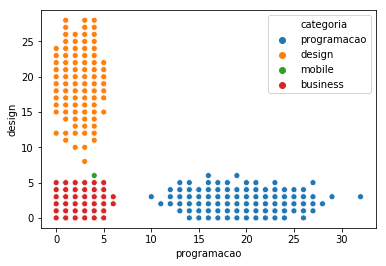

In [13]:
alunos = gera_todos_os_alunos(['programacao', 'design', 'mobile', 'business'])
sns.scatterplot(x="programacao", y="design", hue="categoria", data=alunos)

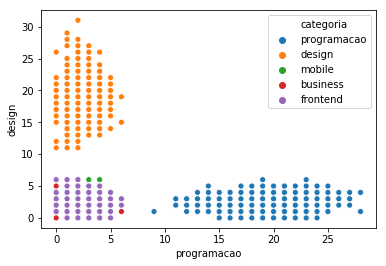

In [14]:
alunos = gera_todos_os_alunos(['programacao', 'design', 'mobile', 'business', 'frontend'])
sns.scatterplot(x="programacao", y="design", hue="categoria", data=alunos)

# Usando PCA para reduzir o número de dimensões

PCA pode ser utilizado por alguns motivos distintos como feature selection etc. Nesse caso estamos usando para entender o que ela faz intuitivamente, portanto usamos o exemplo de visualização de dados em um conjunto de dados escolhido e gerado propositalmente para isso.

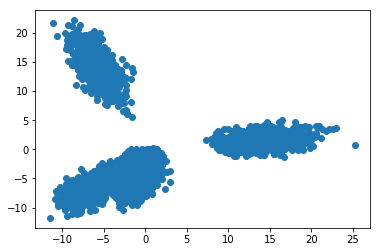

In [15]:
from sklearn.decomposition import PCA

alunos_sem_categoria = alunos.drop("categoria", axis=1)
pca = PCA(n_components=2)
pca.fit(alunos_sem_categoria)
r2 = pca.transform(alunos_sem_categoria)

plt.scatter(r2[:,0], r2[:,1])

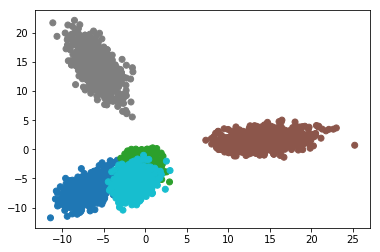

In [16]:
cores = {'programacao':1, 'mobile':2, 'design':3, 'business':4, 'frontend':5}

plt.scatter(r2[:,0], r2[:,1], c=alunos.categoria.apply(lambda x: cores[x]), cmap='tab10')

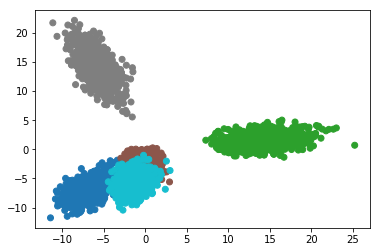

In [17]:
def cores_para_categorias(valores):
    cores = {key: index for index, key in enumerate(valores.unique())}
    return valores.apply(lambda x: cores[x])

plt.scatter(r2[:,0], r2[:,1], c=cores_para_categorias(alunos.categoria), cmap='tab10')

# Standardization

Na prática, é importante padronizar os dados antes de redimensionar pois o PCA dá mais peso para "eixos com valores mais altos". Tirando a média e dividindo pelo desvio padrão (o StandardScaler) ajuda a decompor melhor os componentes principais da nossa base de eixos.

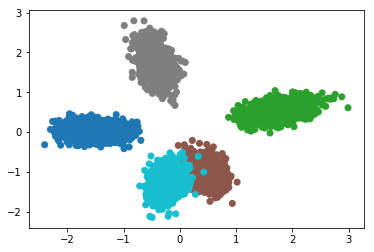

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca = make_pipeline(StandardScaler(), PCA(n_components=2))
pca.fit(alunos_sem_categoria)
r2 = pca.transform(alunos_sem_categoria)

plt.scatter(r2[:,0], r2[:,1], c=cores_para_categorias(alunos.categoria), cmap='tab10')

(-3, 3)

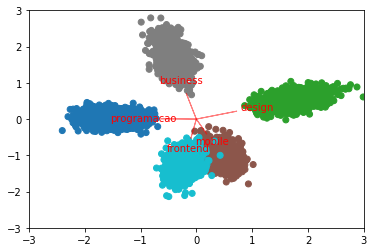

In [19]:
pca = PCA(n_components=2)
pipe = make_pipeline(StandardScaler(), pca)
pipe.fit(alunos_sem_categoria)
r2 = pipe.transform(alunos_sem_categoria)

plt.scatter(r2[:,0], r2[:,1], c=cores_para_categorias(alunos.categoria), cmap='tab10')

coeff = np.transpose(pca.components_)
for i in range(5):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'red',alpha = 0.5)
    plt.text(coeff[i,0]* 1.5, coeff[i,1] * 1.5, alunos.columns[i], color = 'red', ha = 'center', va = 'center')

plt.xlim(-3,3)
plt.ylim(-3,3)